# Run Rate Progression
Run rate refers to the average number of runs scored by the batting team per over. It is calculated by dividing the total runs scored at any given point in the innings by the number of overs bowled.

Formula: Run Rate = Total Runs Scored / Overs Bowled

Variation in Run Rate:

The run rate in a match is not constant. It fluctuates throughout the innings due to various factors:

Batsman Aggression: Aggressive batsmen who hit boundaries frequently can cause the run rate to climb rapidly.
Bowling Attack: A skilled bowling attack that takes wickets or concedes fewer runs can lower the run rate.
Match Situation: The score, number of wickets lost, and overs remaining all influence the batting team's strategy, impacting the run rate. Early overs might see a focus on building partnerships, leading to a slower run rate, while later stages might require aggressive scoring to chase a target.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/processed_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217242 entries, 0 to 217241
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   batter               217242 non-null  object 
 1   bowler               217242 non-null  object 
 2   non_striker          217242 non-null  object 
 3   runs_by_bat          217242 non-null  int64  
 4   extra_runs           217242 non-null  int64  
 5   total_runs_delivery  217242 non-null  int64  
 6   current_team_total   217242 non-null  int64  
 7   runs_remain          217242 non-null  float64
 8   batter_runs          217242 non-null  int64  
 9   balls_faced          217242 non-null  int64  
 10  wickets_fallen       217242 non-null  int64  
 11  extra_type           217242 non-null  object 
 12  delivery             217242 non-null  float64
 13  over                 217242 non-null  int64  
 14  wicket_type          217242 non-null  object 
 15  player_out       

In [3]:
# Drop the columns that are not needed
columns_needed = ['match_id', 'over', 'delivery', 'current_team_total', 'final_team_total', 'wickets_fallen', 'innings', 'batting_team','winning_team']
rrdata = data[columns_needed]

In [4]:
# only the last entry of an over is needed
# to get this, we will group the data by match_id, innings and over
# and then get the last entry of each group
rrdata = rrdata.groupby(['match_id', 'innings', 'over']).last().reset_index()

# # create a new column indicating won or lost status
rrdata['won'] = rrdata['batting_team'] == rrdata['winning_team']

# drop 'batting_team' and 'winning_team' columns
rrdata = rrdata.drop(['batting_team', 'winning_team'], axis=1)

# drop the columns the delivery
rrdata = rrdata.drop('delivery', axis=1)

# offset over by 1
rrdata['over'] = rrdata['over'] + 1

# calculate the run rate
rrdata['run_rate'] = rrdata['current_team_total'] / (rrdata['over'])
rrdata.head(20)

,match_id,innings,over,current_team_total,final_team_total,wickets_fallen,won,run_rate
0,Afghanistan_Bangladesh_2018-06-03,1,1,9,167,0,True,9.000000
1,Afghanistan_Bangladesh_2018-06-03,1,2,13,167,0,True,6.500000
2,Afghanistan_Bangladesh_2018-06-03,1,3,23,167,0,True,7.666667
3,Afghanistan_Bangladesh_2018-06-03,1,4,27,167,0,True,6.750000
4,Afghanistan_Bangladesh_2018-06-03,1,5,42,167,0,True,8.400000
5,Afghanistan_Bangladesh_2018-06-03,1,6,44,167,0,True,7.333333
6,Afghanistan_Bangladesh_2018-06-03,1,7,55,167,0,True,7.857143
7,Afghanistan_Bangladesh_2018-06-03,1,8,60,167,0,True,7.500000
8,Afghanistan_Bangladesh_2018-06-03,1,9,64,167,1,True,7.111111
9,Afghanistan_Bangladesh_2018-06-03,1,10,72,167,1,True,7.200000


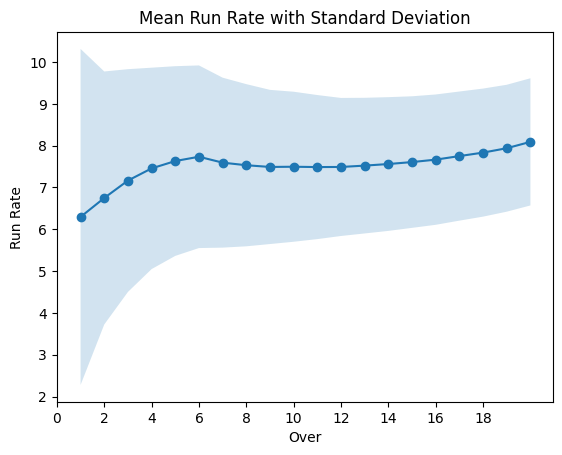

In [5]:
# finding  the mean run rate for each over 
rrdata_grouped_over = rrdata.groupby('over')
mean_rr = rrdata_grouped_over['run_rate'].mean()

# finding the median run rate for each over
median_rr = rrdata_grouped_over['run_rate'].median()

# finding the standard deviation of the run rate for each over
std_rr = rrdata_grouped_over['run_rate'].std()

# plot the mean of the run rate with the standard deviation
# the standard deviation will be shown as a shaded region
# overs is a discrete variable, the x-axis will have discrete values

plt.plot(mean_rr.index, mean_rr, '-o')
plt.fill_between(mean_rr.index, mean_rr - std_rr, mean_rr + std_rr, alpha=0.2)
plt.xlabel('Over')
plt.xticks(np.arange(0, 20, 2))
plt.ylabel('Run Rate')
plt.title('Mean Run Rate with Standard Deviation')
plt.show()

# plt.errorbar(mean_rr.index, mean_rr, yerr=std_rr, fmt='-o')
# plt.xlabel('Over')
# plt.ylabel('Run Rate')
# plt.title('Mean Run Rate with Standard Deviation')
# plt.show()






The above progression suggests that the run scoring starts slow, and then accelerates to the end of the powerplay at the 6th over, and then stabilizes to quietly reaching higher scoring rates in the last phase of the match

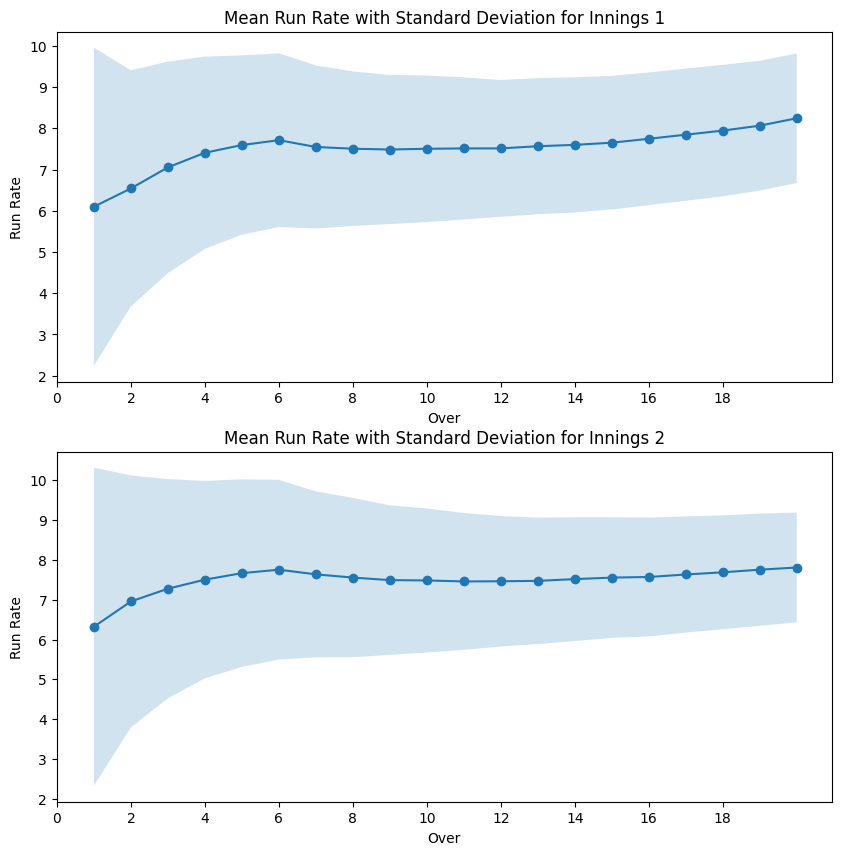

In [6]:
# similarly, but for each innings separately
rrdata_grouped_innings = rrdata.groupby(['innings', 'over'])
mean_rr_innings = rrdata_grouped_innings['run_rate'].mean()
median_rr_innings = rrdata_grouped_innings['run_rate'].median()
std_rr_innings = rrdata_grouped_innings['run_rate'].std()

# plot the mean of the run rate with the standard deviation
# the standard deviation will be shown as a shaded region
# overs is a discrete variable, the x-axis will have discrete values
# separate plots for each innings

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(mean_rr_innings.loc[1].index, mean_rr_innings.loc[1], '-o')
ax[0].fill_between(mean_rr_innings.loc[1].index, mean_rr_innings.loc[1] - std_rr_innings.loc[1], mean_rr_innings.loc[1] + std_rr_innings.loc[1], alpha=0.2)
ax[1].plot(mean_rr_innings.loc[2].index, mean_rr_innings.loc[2], '-o')
ax[1].fill_between(mean_rr_innings.loc[2].index, mean_rr_innings.loc[2] - std_rr_innings.loc[2], mean_rr_innings.loc[2] + std_rr_innings.loc[2], alpha=0.2)

for i in range(2):
	ax[i].set_xlabel('Over')
	ax[i].set_xticks(np.arange(0, 20, 2))
	ax[i].set_ylabel('Run Rate')
	ax[i].set_title(f'Mean Run Rate with Standard Deviation for Innings {i+1}')
plt.show()


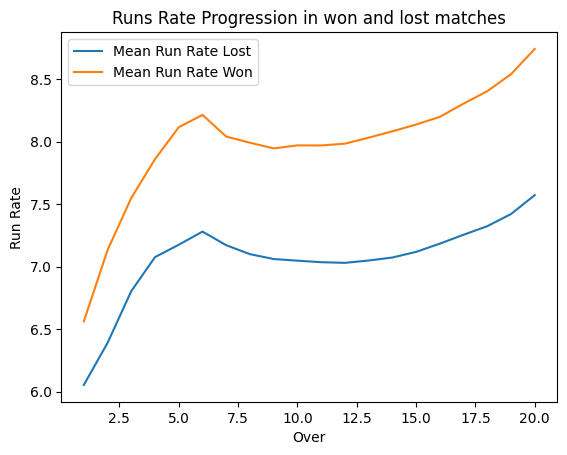

In [7]:
# similarly but separated for won and loss
gp = rrdata.groupby(['won', 'over'])['run_rate']
mean_rr = gp.mean()
std_rr = gp.std()

# both curves in the same plot
plt.plot(mean_rr[False], label='Mean Run Rate Lost')
plt.plot(mean_rr[True], label='Mean Run Rate Won')
plt.legend()
plt.xlabel('Over')
plt.ylabel('Run Rate')
plt.title('Runs Rate Progression in won and lost matches')
plt.show()
